![bmw_logo](BMW-Logo-2020-present.jpg)

In [502]:
import pandas as pd
import numpy as np
import re
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns

In [503]:
try:
    os.makedirs("figures")
except FileExistsError:
    pass

In [504]:
df = pd.read_csv(
    filepath_or_buffer="bmw.csv"
)

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


### 🚗 SECTION 1 — Price Landscape & Distribution

#### Overall Price Distribution

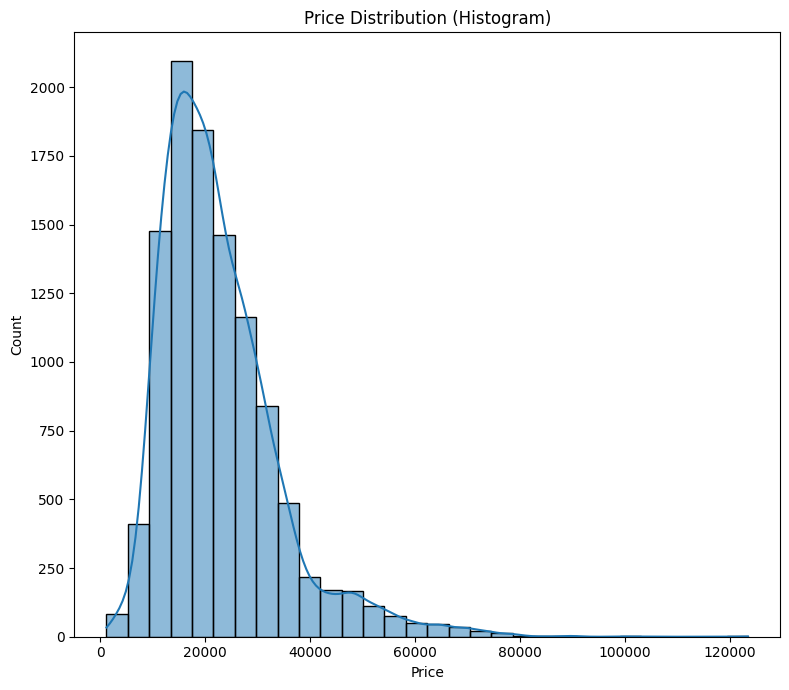

In [506]:
title = "Distribution of Price"

plt.figure(figsize=(8, 7))

sns.histplot(
    df["price"],
    bins=30,
    kde=True
)

plt.title("Price Distribution (Histogram)")
plt.ylabel("Count")
plt.xlabel("Price")

plt.tight_layout()

filename = "figures/price_distribution.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Price by Year

In [507]:
stats = (
    df
    .groupby(by="year")
    .agg(mean_price=("price", "mean"))
    .reset_index()
)

In [508]:
stats

,year,mean_price
0,1996,5995.000000
1,1997,3950.000000
2,1998,3950.000000
3,1999,3285.000000
4,2000,1624.500000
5,2001,7333.333333
6,2002,5486.500000
7,2003,9222.500000
8,2004,8213.166667
9,2005,5390.166667


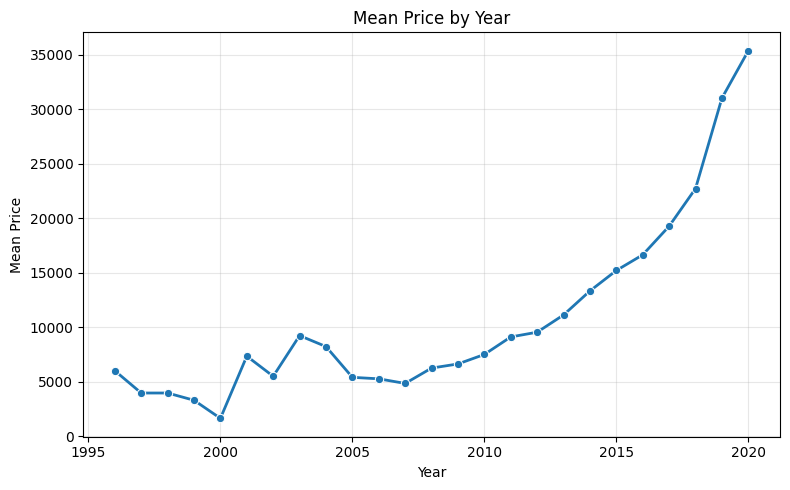

In [509]:
title = "Mean Price by Year"

plt.figure(figsize=(8, 5))

sns.lineplot(
    data=stats,
    x="year",
    y="mean_price",
    marker="o",
    linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Mean Price")
plt.title(title)
plt.grid(alpha=0.3)
plt.tight_layout()

filename = "figures/mean_price_by_year.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Price by Transmission Type

In [510]:
df["transmission"].value_counts()

transmission
Semi-Auto    4666
Automatic    3588
Manual       2527
Name: count, dtype: int64

In [511]:
manual = df[df["transmission"] == "Manual"]
automatic = df[df["transmission"] == "Automatic"]
semi_auto = df[df["transmission"] == "Semi-Auto"] 

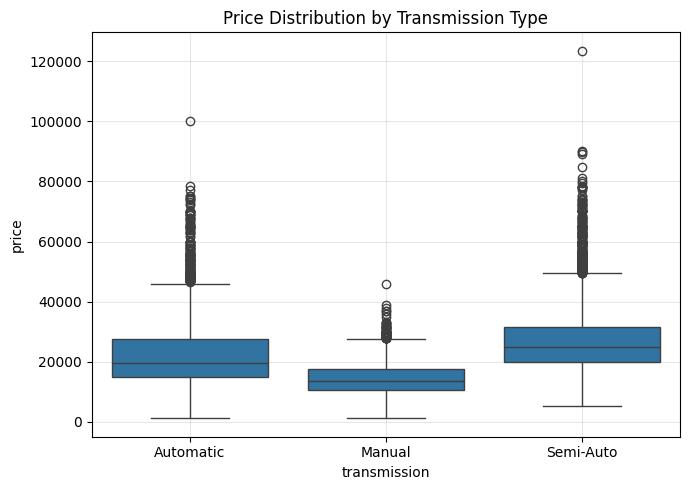

In [512]:
title = "Price Distribution by Transmission Type"

plt.figure(figsize=(7, 5))

sns.boxplot(
    data=df,
    x="transmission",
    y="price"
)

plt.title(title)
plt.grid(alpha=0.3)
plt.tight_layout()

filename = "figures/price_distribution_by_transmission_type.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()


### 🏎️ SECTION 2 — Mileage, Age & Depreciation Effects

#### Mileage Distribution

In [513]:
df.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0


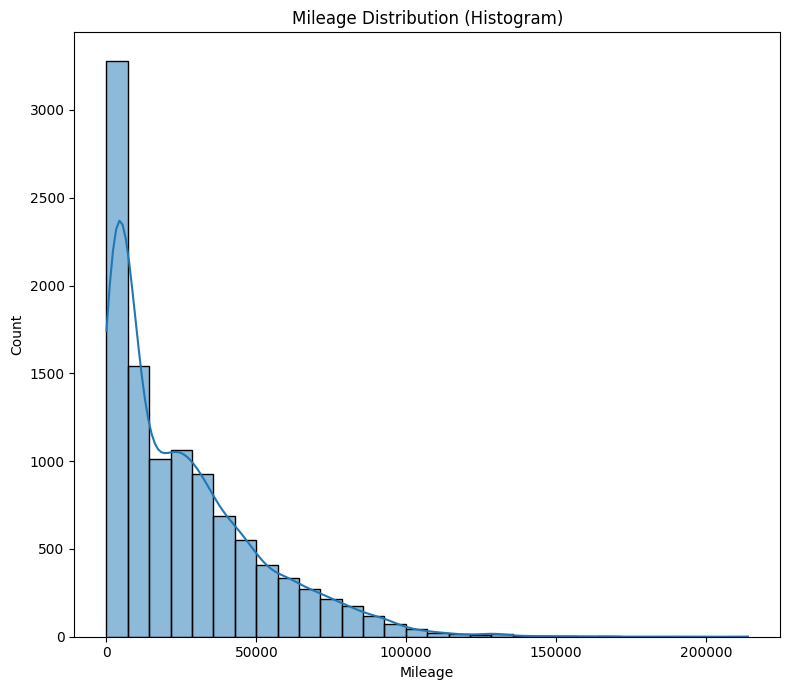

In [514]:
title = "Distribution of Mileage"

plt.figure(figsize=(8, 7))

sns.histplot(
    df["mileage"],
    bins=30,
    kde=True
)

plt.title("Mileage Distribution (Histogram)")
plt.ylabel("Count")
plt.xlabel("Mileage")

plt.tight_layout()

filename = "figures/mileage_distribution.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Mileage vs Price Relationship

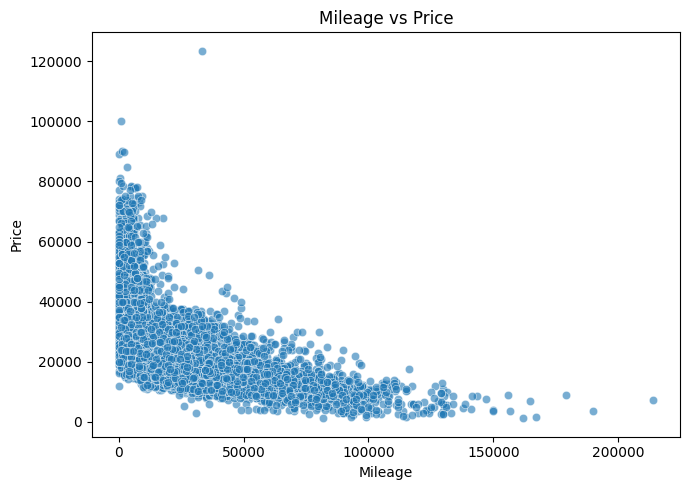

In [515]:
title = "Mileage vs Price"

plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df,
    x="mileage",
    y="price",
    alpha=0.6
)

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title(title)
plt.tight_layout()

filename = "figures/mileage_vs_price.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Car Age vs Mileage

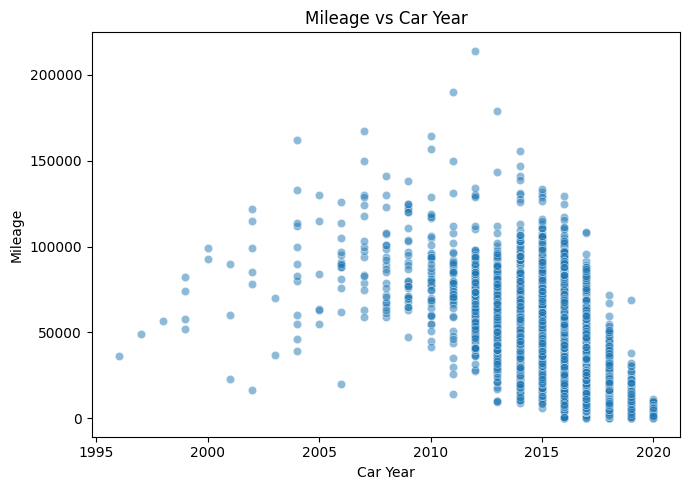

In [516]:
title = "Mileage vs Car Year"

plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df,
    x="year",
    y="mileage",
    alpha=0.5
)

plt.xlabel("Car Year")
plt.ylabel("Mileage")
plt.title(title)
plt.tight_layout()

filename = "figures/mileage_vs_year.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()


#### Depreciation Buckets

In [517]:
mileage_bins = pd.qcut(
    df["mileage"],
    q=4,
    duplicates="drop",
    labels=["low", "medium", "high", "very high"]
)

df["mileage_flag"] = mileage_bins

In [518]:
df["mileage_flag"].value_counts()

mileage_flag
low          2696
medium       2695
high         2695
very high    2695
Name: count, dtype: int64

In [519]:
stats = (
    df
    .groupby(by="mileage_flag", observed=True)
    .agg(mean_price=("price", "mean"))
    .reset_index()
)

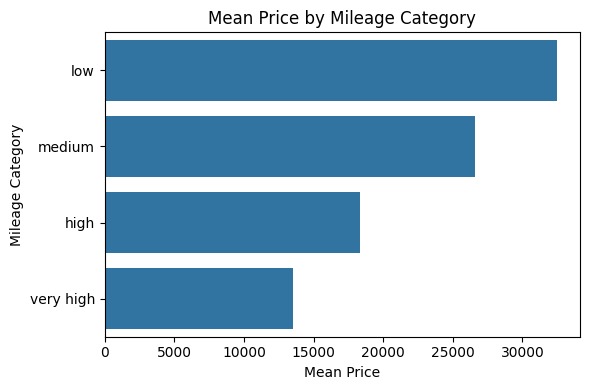

In [520]:
title = "Mean Price by Mileage Category"

plt.figure(figsize=(6, 4))

sns.barplot(
    data=stats,
    x="mean_price",
    y="mileage_flag"
)

plt.xlabel("Mean Price")
plt.ylabel("Mileage Category")
plt.title(title)
plt.tight_layout()

filename = "figures/mean_price_by_mileage_category.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()


### ⛽ SECTION 3 — Fuel Type & Efficiency Analysis

#### Fuel Type Popularity

In [521]:
df.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mileage_flag
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,very high


In [522]:
stats = (
    df
    .groupby(by="fuelType")
    .agg(cars=("fuelType", "count"))
    .sort_values(by="cars", ascending=False)
    .reset_index()
)

stats

,fuelType,cars
0,Diesel,7027
1,Petrol,3417
2,Hybrid,298
3,Other,36
4,Electric,3


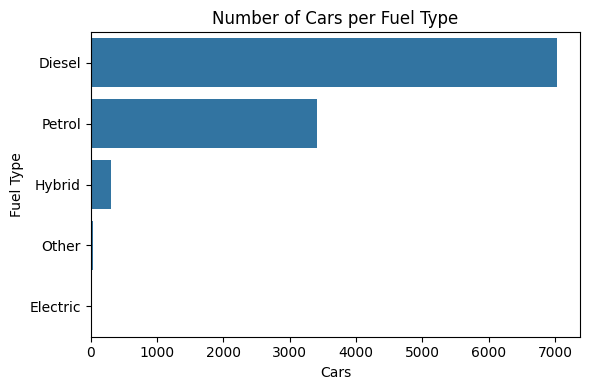

In [523]:
title = "Number of Cars per Fuel Type"

plt.figure(figsize=(6, 4))

sns.barplot(
    data=stats,
    x="cars",
    y="fuelType"
)

plt.xlabel("Cars")
plt.ylabel("Fuel Type")
plt.title(title)
plt.tight_layout()

filename = "figures/cars_by_fuel_type.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Fuel Type vs Price

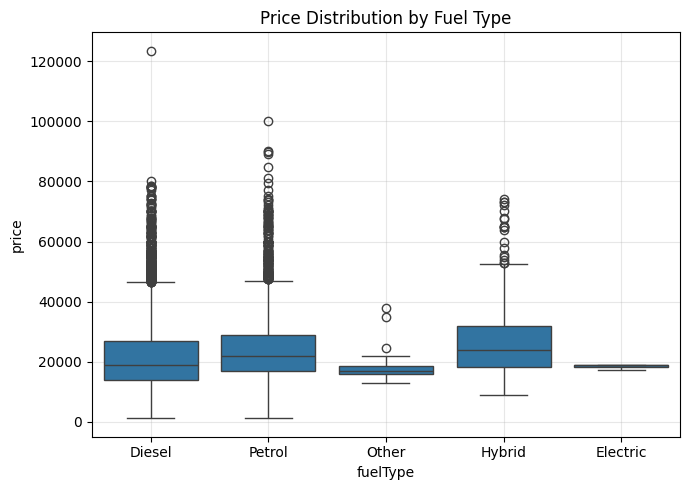

In [524]:
title = "Price Distribution by Fuel Type"

plt.figure(figsize=(7, 5))

sns.boxplot(
    data=df,
    x="fuelType",
    y="price"
)

plt.title(title)
plt.grid(alpha=0.3)
plt.tight_layout()

filename = "figures/price_distribution_by_fuel_type.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### MPG Distribution

In [525]:
df_cut = df[df["mpg"] < 100]

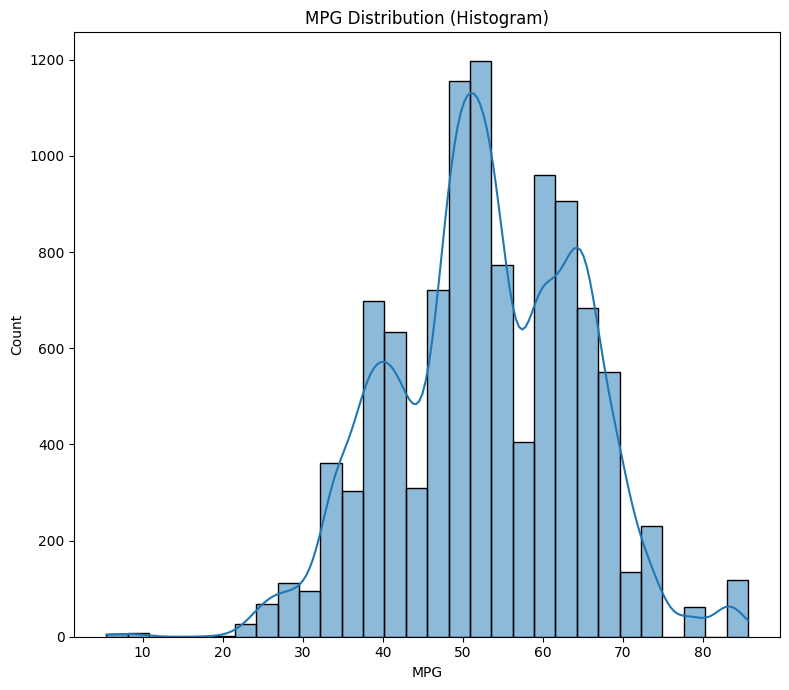

In [526]:
title = "MPG Distribution"

plt.figure(figsize=(8, 7))

sns.histplot(
    df_cut["mpg"],
    bins=30,
    kde=True
)

plt.title("MPG Distribution (Histogram)")
plt.ylabel("Count")
plt.xlabel("MPG")

plt.tight_layout()

filename = "figures/mpg_distribution.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### MPG vs Price Trade-off

In [527]:
df_cut = df[df["mpg"] < 100]

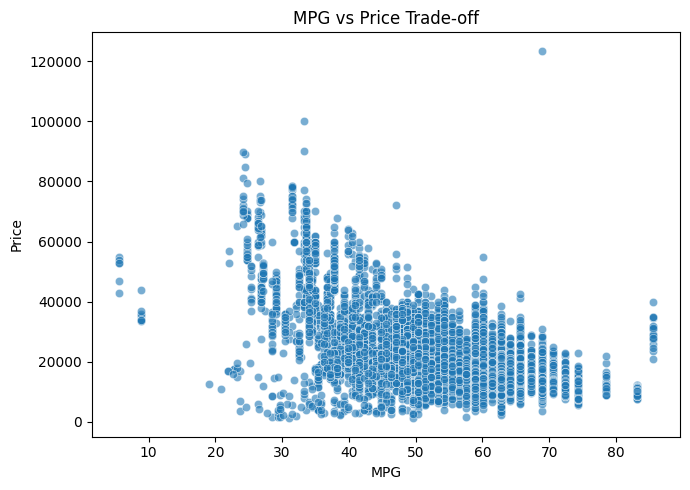

In [528]:
title = "MPG vs Price Trade-off"

plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df_cut,
    x="mpg",
    y="price",
    alpha=0.6
)

plt.xlabel("MPG")
plt.ylabel("Price")
plt.title(title)
plt.tight_layout()

filename = "figures/mpg_vs_price.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

### ⚙️ SECTION 4 — Engine & Performance Signals

#### Engine Size Distribution

In [529]:
top10 = (
    df["engineSize"]
    .value_counts()
    .head(10)
    .reset_index()
)

top10


,engineSize,count
0,2.0,6575
1,3.0,2458
2,1.5,1463
3,1.6,109
4,4.4,79
5,0.0,47
6,2.5,14
7,0.6,7
8,2.2,6
9,4.0,6


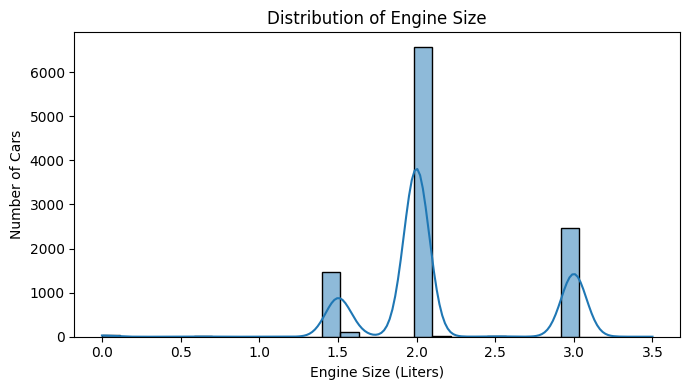

In [530]:
df_cut = df[df["engineSize"] < 4.0]

title = "Distribution of Engine Size"

plt.figure(figsize=(7, 4))

sns.histplot(
    df_cut["engineSize"],
    bins=30,
    kde=True
)

plt.xlabel("Engine Size (Liters)")
plt.ylabel("Number of Cars")
plt.title(title)
plt.tight_layout()

filename = "figures/engine_size_distribution.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Engine Size vs Price

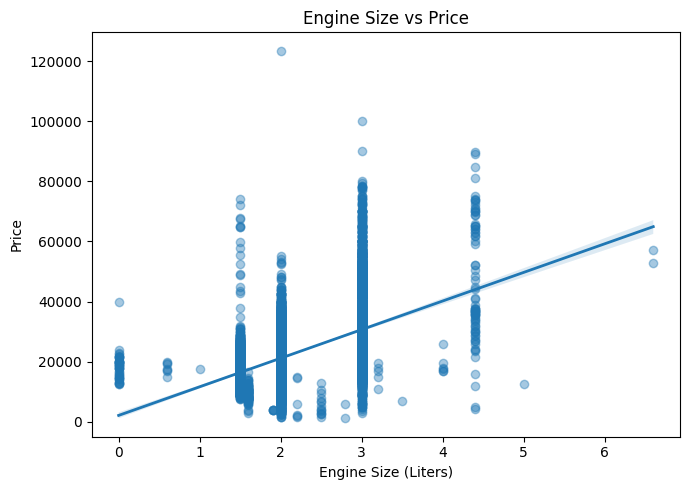

In [531]:
title = "Engine Size vs Price"

plt.figure(figsize=(7, 5))

sns.regplot(
    data=df,
    x="engineSize",
    y="price",
    scatter_kws={"alpha": 0.4},
    line_kws={"linewidth": 2}
)

plt.xlabel("Engine Size (Liters)")
plt.ylabel("Price")
plt.title(title)
plt.tight_layout()

filename = "figures/engine_size_vs_price.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Performance Segmentation

In [532]:
df["engine_segment"] = pd.qcut(
    df["engineSize"],
    q=5,
    duplicates="drop",
)

In [533]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mileage_flag,engine_segment
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,very high,"(-0.001, 2.0]"
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,medium,"(-0.001, 2.0]"
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,very high,"(2.0, 3.0]"
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,high,"(-0.001, 2.0]"
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,very high,"(2.0, 3.0]"


In [534]:
df["engine_segment"].value_counts()

engine_segment
(-0.001, 2.0]    8207
(2.0, 3.0]       2480
(3.0, 6.6]         94
Name: count, dtype: int64

In [535]:
stats = (
    df
    .groupby(by="engine_segment", observed=True)
    .agg(
        mean_price=("price", "mean"),
        mean_mpg=("mpg", "mean")
    )
)

stats["mean_price"] = np.round(stats["mean_price"], 2)
stats["mean_mpg"] = np.round(stats["mean_mpg"], 2)

In [536]:
stats

,mean_price,mean_mpg
engine_segment,,
"(-0.001, 2.0]",19909.79,60.65
"(2.0, 3.0]",31318.98,43.46
"(3.0, 6.6]",42746.46,26.82


### 🧠 SECTION 5 — Multivariate Patterns & Market Insights

#### Correlation Heatmap

In [537]:
df = df.drop(labels=["mileage_flag", "engine_segment"], axis="columns")
df_no_models = df.drop(labels=["model"], axis="columns")

In [538]:
df_no_models = pd.get_dummies(
    data=df_no_models
)

In [539]:
df_no_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    10781 non-null  int64  
 1   price                   10781 non-null  int64  
 2   mileage                 10781 non-null  int64  
 3   tax                     10781 non-null  int64  
 4   mpg                     10781 non-null  float64
 5   engineSize              10781 non-null  float64
 6   transmission_Automatic  10781 non-null  bool   
 7   transmission_Manual     10781 non-null  bool   
 8   transmission_Semi-Auto  10781 non-null  bool   
 9   fuelType_Diesel         10781 non-null  bool   
 10  fuelType_Electric       10781 non-null  bool   
 11  fuelType_Hybrid         10781 non-null  bool   
 12  fuelType_Other          10781 non-null  bool   
 13  fuelType_Petrol         10781 non-null  bool   
dtypes: bool(8), float64(2), int64(4)
memor

In [540]:
cm = df_no_models.corr(method="pearson")
cm

,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337,-0.133848,-0.244738,0.336549,-0.142377,-0.007663,0.041303,-0.010844,0.132844
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196,-0.019452,-0.392430,0.354026,-0.114361,-0.006237,0.065526,-0.023019,0.097082
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540,0.177921,0.202986,-0.342767,0.237032,-0.003697,-0.014059,0.044349,-0.243107
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616,0.030620,-0.223368,0.161857,-0.257322,-0.023517,-0.137354,-0.070351,0.321431
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844,0.116564,0.038181,-0.143505,0.060768,0.220636,0.540628,0.264083,-0.293361
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000,0.115764,-0.330941,0.172854,0.074419,-0.055441,-0.137333,-0.051960,-0.019378
transmission_Automatic,-0.133848,-0.019452,0.177921,0.030620,0.116564,0.115764,1.000000,-0.390788,-0.616943,0.062127,0.023622,0.111451,0.081955,-0.113889
transmission_Manual,-0.244738,-0.392430,0.202986,-0.223368,0.038181,-0.330941,-0.390788,1.000000,-0.483331,-0.007853,-0.009231,-0.093290,-0.032027,0.045213
transmission_Semi-Auto,0.336549,0.354026,-0.342767,0.161857,-0.143505,0.172854,-0.616943,-0.483331,1.000000,-0.052373,-0.014574,-0.026235,-0.050562,0.069659
fuelType_Diesel,-0.142377,-0.114361,0.237032,-0.257322,0.060768,0.074419,0.062127,-0.007853,-0.052373,1.000000,-0.022826,-0.230676,-0.079193,-0.931973


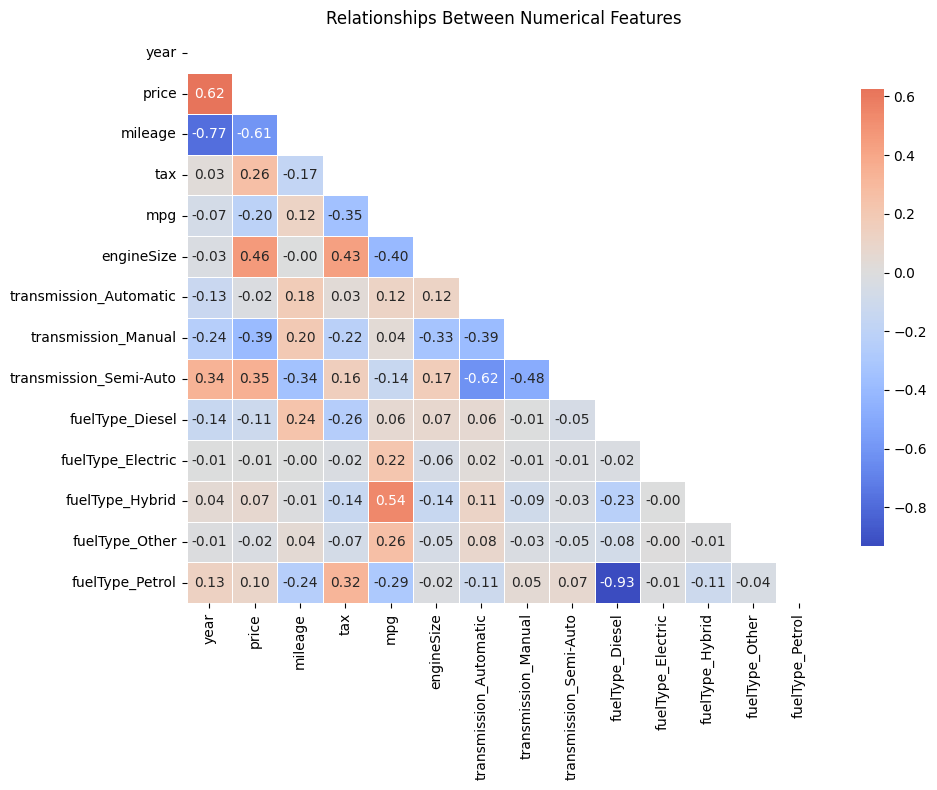

In [541]:
mask = np.triu(np.ones_like(cm, dtype=bool))

title = "Relationships Between Numerical Features"

plt.figure(figsize=(10, 8))

sns.heatmap(
    cm,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title(title)
plt.tight_layout()

filename = "figures/numerical_features_correlation_lower_triangle.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Top Price Drivers

In [542]:
price_drivers = (
    cm
    .loc[:, "price"]
    .drop(labels="price", axis="index")
    .reset_index()
    .sort_values(by="price", ascending=False)
)
price_drivers

,index,price
0,year,0.623756
4,engineSize,0.460196
7,transmission_Semi-Auto,0.354026
2,tax,0.263484
12,fuelType_Petrol,0.097082
10,fuelType_Hybrid,0.065526
9,fuelType_Electric,-0.006237
5,transmission_Automatic,-0.019452
11,fuelType_Other,-0.023019
8,fuelType_Diesel,-0.114361


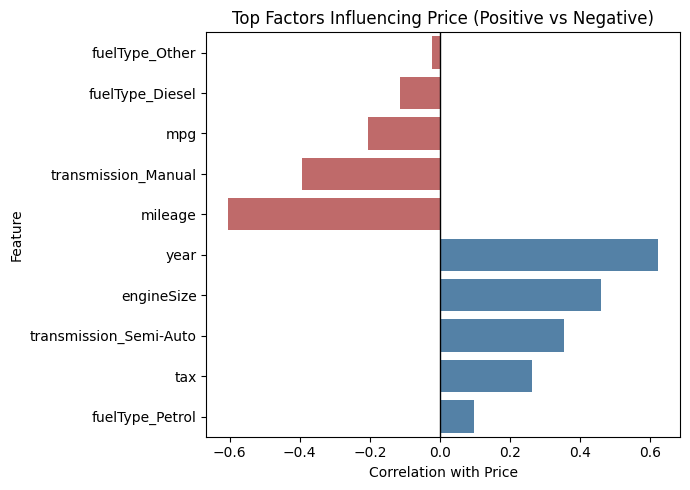

In [543]:
# Split top positive & negative
top_pos = price_drivers.head(5)
top_neg = price_drivers.tail(5)

plot_df = pd.concat([top_neg, top_pos])

title = "Top Factors Influencing Price (Positive vs Negative)"

plt.figure(figsize=(7, 5))

sns.barplot(
    data=plot_df,
    x="price",
    y="index",
    hue=(plot_df["price"] > 0),
    palette={True: "steelblue", False: "indianred"},
    legend=False
)

plt.axvline(0, color="black", linewidth=1)

plt.xlabel("Correlation with Price")
plt.ylabel("Feature")
plt.title(title)
plt.tight_layout()

filename = "figures/top_price_influencers.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Model-Level Price Comparison

In [544]:
stats = (
    df
    .groupby(by="model")
    .agg(
        amount=("model", "count"),
        mean_price=("price", "mean")
    )
    .sort_values(by="amount", ascending=False)
)

stats["mean_price"] = np.round(stats["mean_price"], 2)
stats = stats.head(10)

In [545]:
stats

,amount,mean_price
model,,
3 Series,2443,19880.86
1 Series,1969,15821.67
2 Series,1229,19539.37
5 Series,1056,22537.43
4 Series,995,22498.42
X1,804,19816.56
X3,551,27758.31
X5,468,39651.20
X2,288,28486.66


### 💾 Saving Plots

In [546]:
source = "source: https://www.kaggle.com/datasets/thedrzee/bmw-carsdataset\n"

with open("README.md", "w+") as readme:
    readme.write(source)

In [547]:
all_plots = os.listdir("figures")
print(all_plots)

with open("README.md", "a") as readme:    
    for plot in all_plots:
        if plot.endswith(".png"):
            description = (
                plot
                .replace(".png", "")
                .replace("_", " ")
                .capitalize()
            )
            readme.write(f"\n{description}\n")

            new_line = f"![{plot.replace('.png', '')}](figures/{plot})\n"
            readme.write(new_line)


['cars_by_fuel_type.png', 'engine_size_distribution.png', 'engine_size_vs_price.png', 'mean_price_by_mileage_category.png', 'mean_price_by_year.png', 'mileage_distribution.png', 'mileage_vs_price.png', 'mileage_vs_year.png', 'mpg_distribution.png', 'mpg_vs_price.png', 'numerical_features_correlation_lower_triangle.png', 'price_distribution.png', 'price_distribution_by_fuel_type.png', 'price_distribution_by_transmission_type.png', 'top_price_influencers.png']
